In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [2]:
customer_df = pd.read_csv('customers.csv')

In [3]:
customer_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
customer_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
customer_df.shape

(10695, 11)

In [ ]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
customer_df_cleaned = customer_df.dropna(axis=0)

In [ ]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
customer_df_cleaned.shape

(8819, 11)

In [ ]:
customer_df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
customer_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
customer_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
customer_df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
customer_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
customer_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)


In [ ]:
customers_1 = customer_df_cleaned.copy()

In [ ]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [ ]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
le = LabelEncoder()

In [ ]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [ ]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [ ]:

customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

In [ ]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
customers_1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [ ]:
customers_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [ ]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values


In [ ]:
y1 = customers_1[['Segmentation']].values

In [ ]:
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)

OneHotEncoder()

In [ ]:
y1.shape

(8819, 1)

In [ ]:
y = one_hot_enc.transform(y1).toarray()

In [ ]:
y.shape

(8819, 4)

In [ ]:
y1[0]

array([3])

In [ ]:
y[0]

array([0., 0., 0., 1.])

In [ ]:
X.shape

(8819, 8)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)


In [ ]:

X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [ ]:
X_train.shape

(5908, 8)

In [ ]:
scaler_age = MinMaxScaler()

In [ ]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)


In [ ]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [ ]:
ai_brain = Sequential([
    Dense(units=2,activation='relu',input_shape=[8]),
    Dense(units=2,activation='relu'),
    Dense(units=4,activation='softmax')])

In [ ]:
ai_brain.compile(optimizer='adam',
                 loss= 'categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,
             batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000
24/24 [==============================] - 1s 13ms/step - loss: 1.5500 - accuracy: 0.3170 - val_loss: 1.5008 - val_accuracy: 0.3061
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4787 - accuracy: 0.2976 - val_loss: 1.4478 - val_accuracy: 0.2649
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4332 - accuracy: 0.2786 - val_loss: 1.4177 - val_accuracy: 0.2697
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.4077 - accuracy: 0.2933 - val_loss: 1.3995 - val_accuracy: 0.2941
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3923 - accuracy: 0.3136 - val_loss: 1.3897 - val_accuracy: 0.3057
Epoch 6/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.3833 - accuracy: 0.3157 - val_loss: 1.3837 - val_accuracy: 0.3047
Epoch 7/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.3775 - accuracy: 0.3177 - val_loss: 1.3803 - val_accuracy: 0.3047
Epoch

In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.550016,0.317028,1.500808,0.306080
1,1.478650,0.297563,1.447836,0.264857
2,1.433227,0.278605,1.417650,0.269667
3,1.407706,0.293331,1.399548,0.294057
4,1.392300,0.313643,1.389687,0.305737


<Axes: >

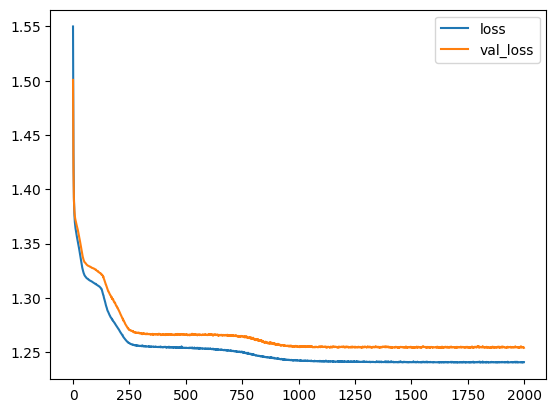

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 0s 1ms/step


In [ ]:
x_test_predictions

array([3, 2, 2, ..., 2, 2, 0])

In [ ]:

x_test_predictions.shape

(2911,)

In [ ]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [ ]:
y_test_truevalue.shape

(2911,)

In [ ]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[328  36 211 182]
 [234  41 311 100]
 [139  29 428  90]
 [180  23 120 459]]


In [ ]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.37      0.43      0.40       757
           1       0.32      0.06      0.10       686
           2       0.40      0.62      0.49       686
           3       0.55      0.59      0.57       782

    accuracy                           0.43      2911
   macro avg       0.41      0.43      0.39      2911
weighted avg       0.41      0.43      0.40      2911



In [ ]:
ai_brain.save('customer_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)


In [ ]:
ai_brain = load_model('customer_classification_model.h5')

In [ ]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)


In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 70ms/step


In [ ]:
print(x_single_prediction)




[2]


In [ ]:
print(le.inverse_transform(x_single_prediction))

['C']
